In [6]:
import numpy as np
from matplotlib import pyplot as plt

from tqdm import tqdm

In [59]:
class BCM:
    def __init__(self, N, theta_0=10, eta=1e-6, y_0=10, tau=50):
        self.N = N
        self.theta = theta_0
        self.eta = eta
        self.y_0 = y_0
        self.tau = tau
        self.w = np.ones(N)

    def _step(self, x):
        y = self.w @ x
        dw_dt = self.eta * y * x * (y - self.theta)
        dtheta_dt = (-self.theta + y**2/self.y_0) / self.tau

        self.w += dw_dt
        self.theta += dtheta_dt

        self.w = np.maximum(0, self.w)
        return y
    
    def simulate(self, X, verbose=True):
        T = X.shape[0]
        Y = np.zeros(T)
        W = np.zeros((T, self.N))
        theta = np.zeros(T)
        loop = tqdm(X) if verbose else X
        for t, x in enumerate(loop):
            Y[t] = self._step(x)
            W[t] = self.w
            theta[t] = self.theta
        return Y, W, theta

100%|██████████| 10000/10000 [00:00<00:00, 84848.60it/s]


In [ ]:
N = 50
alpha = 1.1

# generate covariance matrix with power law
eigenvalues = np.array([alpha**i for i in range(N)])
eigenvectors = np.linalg.qr(np.random.randn(N, N))[0]
cov = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T




bcm = BCM()

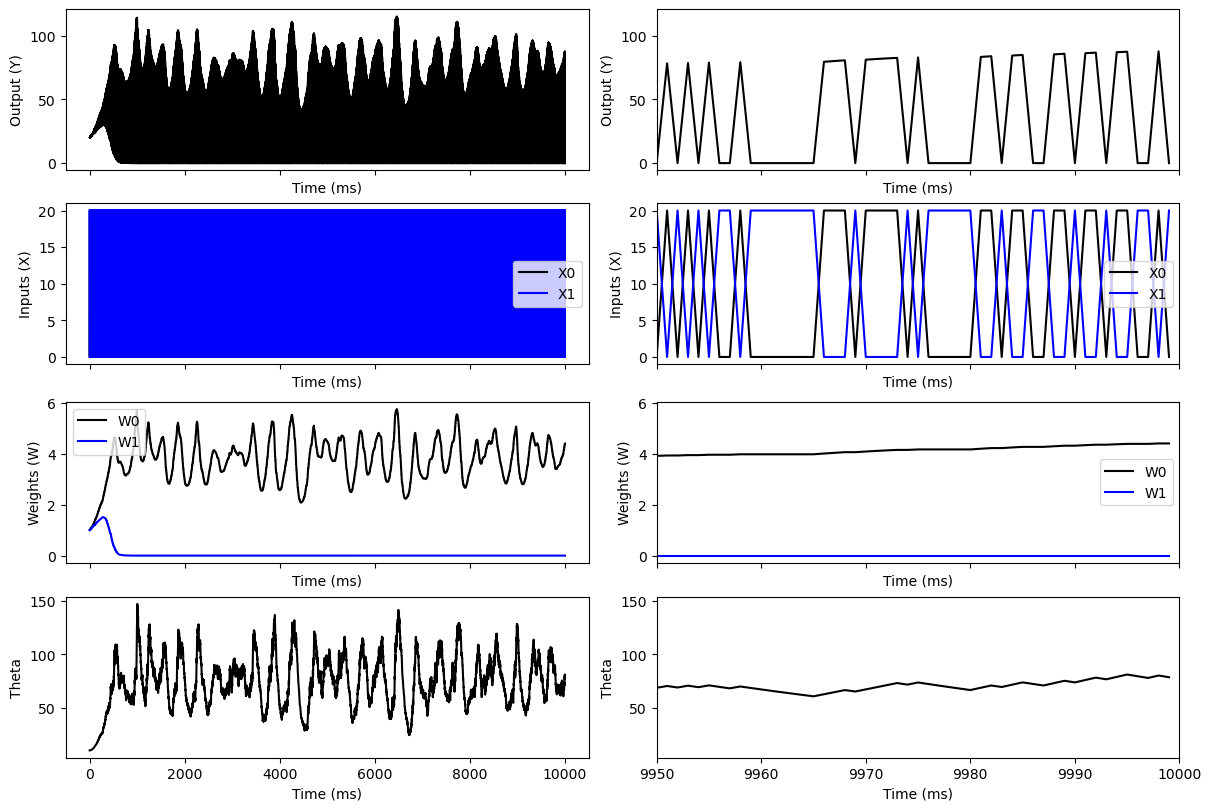

In [60]:
bcm = BCM(2, y_0=40, tau=50)

T = 10 * 1000

X_possible = 20 * np.eye(2)
ipattern = np.random.randint(0, 2, T)

X = X_possible[ipattern]

Y, W, theta = bcm.simulate(X)




fig, ax = plt.subplots(4, 2, figsize=(12, 8), layout="constrained", sharex="col")

ax[0, 0].plot(Y, color='k')
ax[0, 0].set_xlabel("Time (ms)")
ax[0, 0].set_ylabel("Output (Y)")


ax[1, 0].plot(X[:, 0], label="X0", color='k')
ax[1, 0].plot(X[:, 1], label="X1", color='b')
ax[1, 0].legend()
ax[1, 0].set_xlabel("Time (ms)")
ax[1, 0].set_ylabel("Inputs (X)")

ax[2, 0].plot(W[:, 0], label="W0", color='k')
ax[2, 0].plot(W[:, 1], label="W1", color='b')
ax[2, 0].legend()
ax[2, 0].set_xlabel("Time (ms)")
ax[2, 0].set_ylabel("Weights (W)")

ax[3, 0].plot(theta, color='k')
ax[3, 0].set_xlabel("Time (ms)")
ax[3, 0].set_ylabel("Theta")



ax[0, 1].plot(Y, color='k')
ax[0, 1].set_xlim(T-50, T)
ax[0, 1].set_xlabel("Time (ms)")
ax[0, 1].set_ylabel("Output (Y)")

ax[1, 1].plot(X[:, 0], label="X0", color='k')
ax[1, 1].plot(X[:, 1], label="X1", color='b')
ax[1, 1].legend()
ax[1, 1].set_xlim(T-50, T)
ax[1, 1].set_xlabel("Time (ms)")
ax[1, 1].set_ylabel("Inputs (X)")

ax[2, 1].plot(W[:, 0], label="W0", color='k')
ax[2, 1].plot(W[:, 1], label="W1", color='b')
ax[2, 1].legend()
ax[2, 1].set_xlim(T-50, T)
ax[2, 1].set_xlabel("Time (ms)")
ax[2, 1].set_ylabel("Weights (W)")

ax[3, 1].plot(theta, color='k')
ax[3, 1].set_xlim(T-50, T)
ax[3, 1].set_xlabel("Time (ms)")
ax[3, 1].set_ylabel("Theta")


plt.show()

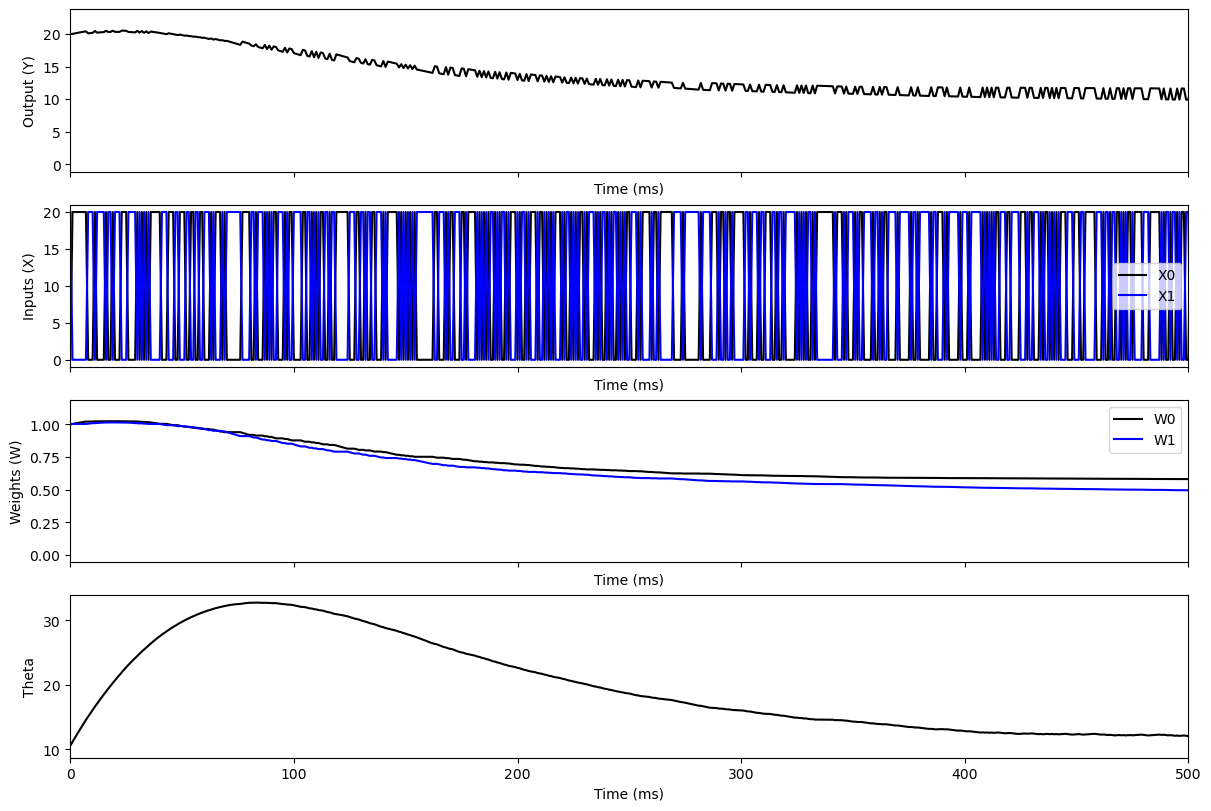

In [44]:
fig, ax = plt.subplots(4, 1, figsize=(12, 8), layout="constrained", sharex="col")

ax[0].plot(Y, color='k')
ax[0].set_xlim(0, 500)
ax[0].set_xlabel("Time (ms)")
ax[0].set_ylabel("Output (Y)")

ax[1].plot(X[:, 0], label="X0", color='k')
ax[1].plot(X[:, 1], label="X1", color='b')
ax[1].legend()
ax[1].set_xlim(0, 500)
ax[1].set_xlabel("Time (ms)")
ax[1].set_ylabel("Inputs (X)")

ax[2].plot(W[:, 0], label="W0", color='k')
ax[2].plot(W[:, 1], label="W1", color='b')
ax[2].legend()
ax[2].set_xlim(0, 500)
ax[2].set_xlabel("Time (ms)")
ax[2].set_ylabel("Weights (W)")

ax[3].plot(theta, color='k')
ax[3].set_xlim(0, 500)
ax[3].set_xlabel("Time (ms)")
ax[3].set_ylabel("Theta")

plt.show()

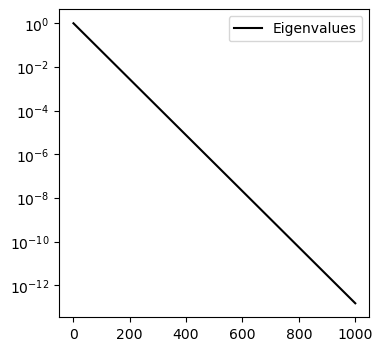

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

N = 1000
T = 10000

alpha = 1.03
eigvalues = alpha**(-np.arange(N))

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(range(1, N+1), eigvalues, c='k', label="Eigenvalues")
ax.legend()
# ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


In [15]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

N = 1000
T = 2000

alpha = 1.01
eigvectors = np.linalg.qr(np.random.randn(N, N))[0]
eigvalues = 1.0 * np.ones(N) #alpha**(-np.arange(N))
cov = eigvectors @ np.diag(eigvalues) @ eigvectors.T
X = np.random.multivariate_normal(np.zeros(N), cov, T)

print("Data is made")

pca_full = PCA().fit(X)

print("PCA Full is finished")

num_components = 50
projection_space = pca_full.components_[:num_components]
X_projected = X @ projection_space.T @ projection_space

pca_projected = PCA().fit(X_projected)
pca_projected_positive = PCA().fit(np.maximum(0, X_projected))

print("Reduced PCA is now done")

# num_iso = np.arange(5, 500, 5)
# iso = [Isomap(n_components=nc).fit(np.maximum(0, X_projected)) for nc in tqdm(num_iso)]
# rerror = np.array([iso[i].reconstruction_error() for i in range(len(iso))])

sglvals = np.sqrt((T-1)*eigvalues)

Data is made
PCA Full is finished
Reduced PCA is now done


  0%|          | 0/99 [00:00<?, ?it/s]

KeyboardInterrupt: 

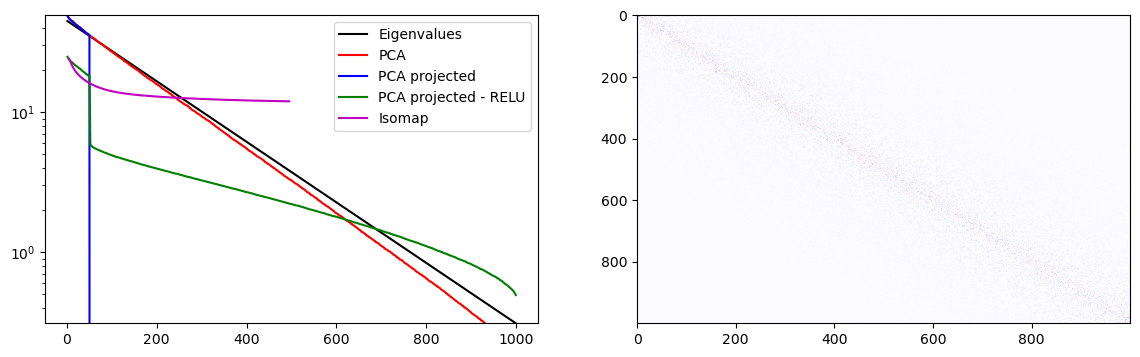

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(range(1, N+1), sglvals, c='k', label="Eigenvalues")
ax[0].plot(range(1, N+1), pca_full.singular_values_, c='r', label="PCA")
ax[0].plot(range(1, N+1), pca_projected.singular_values_, c='b', label="PCA projected")
ax[0].plot(range(1, N+1), pca_projected_positive.singular_values_, c='g', label="PCA projected - RELU")
ax[0].plot(num_iso, rerror, c='m', label="Isomap")
ax[0].legend()
# ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylim(sglvals.min(), sglvals.max()*1.1)
ax[1].imshow(eigvectors.T @ pca_full.components_.T, cmap='bwr', aspect='auto')
plt.show()

In [3]:
iso.reconstruction_error()

59.39570378592774

In [23]:
eigvectors.shape, pca.components_.shape

((100, 100), (100, 10000))

In [24]:
dir(pca)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_features_out',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fi